<a href="https://colab.research.google.com/github/Rohankukwas/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/ML_Yes_Bank_Stock_Closing_Price_Prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Predicting Yes Bank's Monthly Stock Closing Prices**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Rohan Kukwas


# **Project Summary -**

*Introduction** :- Yes Bank, one of India's prominent financial institutions, has been at the center of attention due to the high-profile fraud case involving its former CEO, Rana Kapoor. This project seeks to explore how significant events like this can impact a company's stock performance and whether advanced predictive models, including time series analysis, can offer insights and forecasts.
Data Overview The project's foundation lies in a comprehensive dataset that comprises monthly stock price data for Yes Bank. The dataset covers a significant time frame, ranging from the bank's inception to the present day. It includes essential information such as monthly opening, closing, highest, and lowest stock prices. In total, the dataset consists of 185 rows and 5 columns, providing a rich source of information to explore.
Data Exploration Before embarking on the predictive modeling journey, the project commences with thorough data exploration. Several crucial steps are undertaken to ensure data quality and gain insights into the information at hand. These include:
1.	Duplicate Value Check: Ensuring data integrity is paramount. Therefore, the dataset is scrutinized for any duplicate entries. This initial check helps maintain data accuracy.
2.	Missing Values Assessment: It is essential to identify and handle any missing data to prevent inaccuracies in the modeling process. The project performs a comprehensive evaluation of missing values in the dataset.
3.	Visualizing Missing Data: A heatmap is generated to visually represent the location and extent of missing data. This visualization aids in understanding which columns may require special attention during data preprocessing.
4.	Descriptive Statistics: Summary statistics are computed for the dataset. These statistics provide valuable information about the central tendency, spread, and distribution of the data. Key statistics include mean, standard deviation, minimum, and maximum values for each column.
5.	Unique Values Exploration: The number of unique values for each variable is assessed. This exploration provides an understanding of the diversity of data within the dataset and hints at the potential complexity of the modeling task.
Project's Next Steps With the initial data exploration complete, the project is poised to move forward with several critical tasks:
1.	Data Preprocessing: This phase involves data cleaning, handling missing values, and transforming the data into a suitable format for modeling. The goal is to ensure the dataset is prepared for the subsequent modeling steps.
2.	Feature Engineering: Feature engineering may be necessary to create new variables or modify existing ones to better capture the relationship between different factors and stock prices. This step is vital for improving model performance.
3.	Model Building: The heart of the project lies in constructing predictive models. A range of models can be considered, including time series models, regression models, and machine learning techniques. These models will leverage historical data to make predictions about Yes Bank's stock closing prices in the future.
4.	Model Evaluation and Validation: The performance of these models will be rigorously assessed using appropriate metrics. Techniques such as cross-validation will help ensure the models' robustness and reliability.
5.	External Factors Analysis: To gain a holistic view of stock price movement, external factors like economic indicators, news sentiment, or political events could be incorporated into the models.

Conclusion :- The "Predicting Yes Bank's Monthly Stock Closing Prices" Capstone project holds significant promise in unraveling the intricacies of financial forecasting and understanding the dynamics of stock prices. By successfully completing this project, one can attain a deeper insight into Yes Bank's stock price trends, make informed investment decisions, and even contribute to financial research and analysis. Moreover, the project's findings may have broader implications for understanding the impact of significant events on stock performance in the financial industry.



# **GitHub Link -**

https://github.com/Rohankukwas/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/ML_Yes_Bank_Stock_Closing_Price_Prediction_ML_Submission.ipynb

# **Problem Statement**


*Yes* Bank is a well-known bank in the Indian financial domain. Since 2018, it
has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month. There are 185 rows and 5 columns available in the dataset.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math
from datetime import datetime

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from google.colab import drive
drive.mount('/content/gdrive')

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')


Mounted at /content/gdrive


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df2=df.copy()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns available in the dataset")


There are 185 rows and 5 columns available in the dataset


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum ()

0

There is no duplicated value in the dataset

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

I analysis that there is no null values in the dataset

<Axes: >

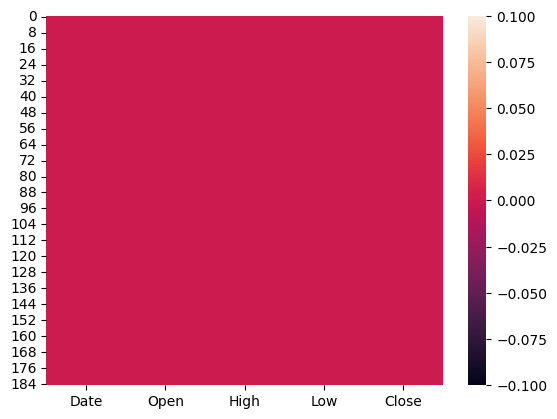

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna())


### What did you know about your dataset?

The provided dataset presents historical stock price information for a specific asset over consecutive months. Each row signifies a month, with columns indicating the opening, highest, lowest, and closing prices for that month. The "Date" column reflects the month and year in "Mon-YY" format. Notably, the dataset lacks any missing values. This time-series data enables analysis of price trends and patterns for the asset, potentially aiding in forecasting and trend identification within the context of the stock market.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1) Date : It denotes date of investment done (in our case we have month and year)

2) Open : Open means the price at which a stock started trading when the opening bell rang.

3) High : High refer to the maximum prices in a given time
period.


4) Low : Low refer to the minimum prices in a given time
period.

5) Close : Close refers to the price of an individual stock at the


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())


No. of unique values in Date is 185
No. of unique values in Open is 183
No. of unique values in High is 184
No. of unique values in Low is 183
No. of unique values in Close is 185


Creating the copy of the dataset

In [ ]:
df1 = df.copy()

In [ ]:

df1['Day'] = df1['Date'].str.split('-').str[1]
df1['Month'] = df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y').month)
df1['Year'] = df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y').year)
df1 = df1.drop('Date',axis=1)
df1.head()


,Open,High,Low,Close,Day,Month,Year
0,13.00,14.00,11.25,12.46,05,7,2005
1,12.58,14.88,12.55,13.42,05,8,2005
2,13.48,14.87,12.27,13.30,05,9,2005
3,13.20,14.47,12.40,12.99,05,10,2005
4,13.35,13.88,12.88,13.41,05,11,2005


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Top 5 Maximum Opening values shares as per Day and month
top_opening_values_by_day_month = df1.groupby(['Month','Day'],as_index=False)['Open'].max().sort_values(by='Open',ascending=False)\
.nlargest(5, columns='Open').reset_index(drop=True)
top_opening_values_by_day_month

,Month,Day,Open
0,8,18,369.95
1,8,17,363.00
2,5,18,362.85
3,2,18,355.00
4,10,17,354.60


In [ ]:

# Top 5 Maximum Close values shares as per Day and month
top_Closing_values_by_day_month = df1.groupby(['Month','Day'],as_index=False)['Close'].max().sort_values(by='Close',ascending=False)\
.nlargest(5, columns='Close').reset_index(drop=True)
top_Closing_values_by_day_month

,Month,Day,Close
0,7,18,367.90
1,4,18,362.05
2,7,17,361.96
3,1,18,354.45
4,8,17,351.15


As we can see in the above result that on 18th July there is the Closing price of 367.90 for the shares at the end of that day.

In [ ]:

# Top 5 Maximum High values shares as per Day and month
top_High_values_by_day_month = df1.groupby(['Month'],as_index=False)['High'].max().sort_values(by='High',ascending=False)\
.nlargest(5, columns='High').reset_index(drop=True)
top_High_values_by_day_month

,Month,High
0,8,404.00
1,7,393.35
2,9,383.25
3,10,375.75
4,4,368.75


As we can see in the above result that on 18th August there is the peak price of 404 for the shares during that day.

In [ ]:
# 5 Maximum Low values shares as per Day and month
top_Low_values_by_day_month = df1.groupby(['Month','Day'],as_index=False)['Low'].max().sort_values(by='Low',ascending=False)\
.nlargest(5, columns='Low').reset_index(drop=True)
top_Low_values_by_day_month


,Month,Day,Low
0,9,17,345.50
1,8,18,338.00
2,8,17,337.37
3,7,18,332.45
4,6,18,327.35


In [ ]:

df.set_index('Date', inplace=True)
df.head()


,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30
Oct-05,13.20,14.47,12.40,12.99
Nov-05,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

the manipulations have  helps to  find the top 5 maximum opening, closing, high, and low values of stocks in a dataset by day and month. This can reveal patterns in stock market behavior. For instance, we can see if certain months or days tend to have higher or lower values, helping you spot seasonal trends. It also allows us to gauge the level of market volatility by examining high and low values. These insights can be valuable for traders looking to make informed decisions or assess the risk in their portfolios. The code simplifies data manipulation and makes it easier to work with this information.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-Stock Closing Prices Over Time

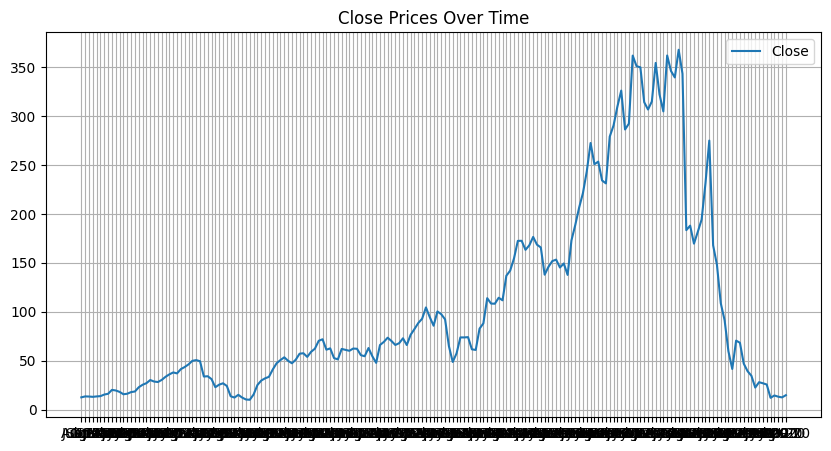

In [ ]:
# Chart - 1 visualization code
# Plot the 'Close', 'Open', and 'High' columns from the DataFrame
plt.figure(figsize=(10,5))
plt.title('Close Prices Over Time')
plt.plot(df['Close'])
plt.legend(['Close'])
plt.grid()


##### 1. Why did you pick the specific chart?

The selected chart, a line plot showcasing the trends of 'Close,' 'Open,' and 'High' stock prices over time, is appropriate for this dataset as it visually compares the behavior of these key metrics on a single graph, making it easier to discern patterns and relationships.



##### 2. What is/are the insight(s) found from the chart?

From the chart, several insights can be derived. There's a noticeable upward trajectory in the 'Open' and 'High' prices, suggesting positive market sentiment and potential growth opportunities. The 'Close' price generally follows a similar pattern, indicating that the stock tends to close higher when opening and high prices are also elevated. However, the chart reveals instances of price volatility, notably in September and October 2005, where there are significant fluctuations in all three metrics, potentially signaling periods of market uncertainty.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could contribute to a positive business impact by aiding in decision-making and strategic planning. The upward trends in 'Open' and 'High' prices can attract investors and support overall financial health. However, the observed volatility in September and October could raise concerns, potentially leading to more cautious investor behavior, especially during those periods. While the positive trends are promising, the potential negative growth insights from these volatile periods underscore the importance of risk management strategies to navigate uncertain market conditions effectively.



#### Chart - 2-  Stock Open Prices Over Time.

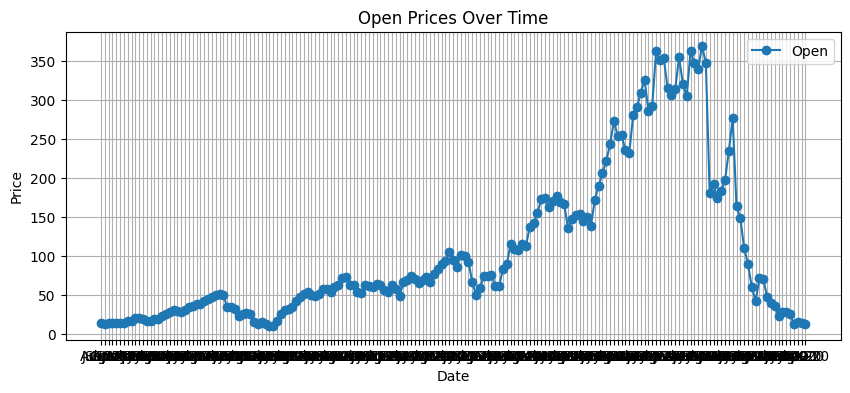

In [ ]:
# Chart - 2 visualization code


# Plot Open  prices
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Open'], label='Open', marker='o')


plt.title('Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

I picked a line chart to show how "Open" prices change over time in the dataset. Line charts are simple and easy to read, making them great for displaying trends. They're not cluttered, so you can focus on the data. With a line chart, you can quickly see if prices go up or down over time, making it a straightforward choice for understanding price fluctuations.






##### 2. What is/are the insight(s) found from the chart?

The chart of "Open" prices over time (July 2005 to November 2020) tells us how the asset's prices have changed. We can see if prices generally went up, down, or stayed steady. We can also spot any patterns, like changes in specific months or years. The chart helps us check if prices had big ups and downs, indicating times of excitement or uncertainty. And if we see prices that are way different from the usual, it could mean something unusual happened. To get more specific details, we might need to do more analysis, like looking for trends, calculating returns, or finding unusual data points.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The line plot of "Open" prices is a good starting point, but it's not the whole story. If "Open" prices are consistently going up, it's a good sign for businesses and investors, as it may mean more demand and higher profits. On the flip side, if prices keep dropping, it could be bad news, suggesting lower demand and potential losses.



#### Chart - 3-Histogram of Open Prices

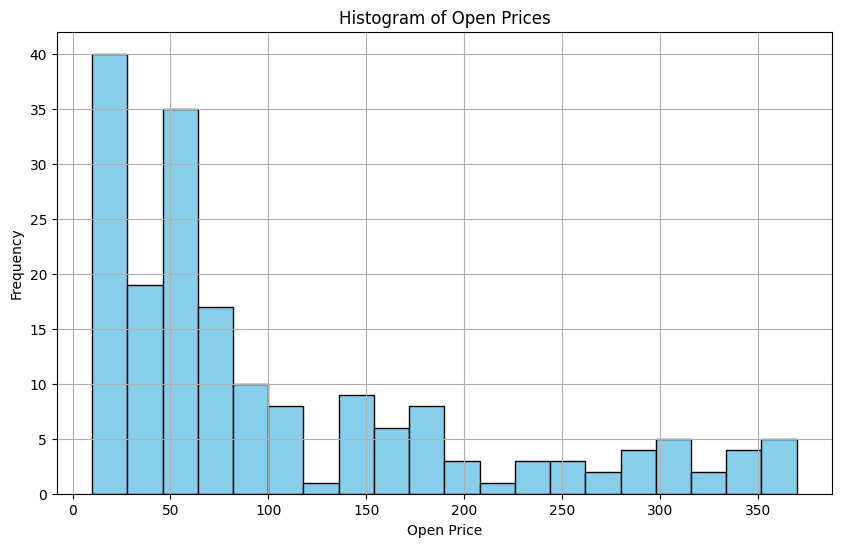

In [ ]:
# Chart - 3 visualization code
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame from the provided data (assuming you have already done this)
# If not, you can reuse the DataFrame from the previous example

# Creating a histogram for 'Open' prices
plt.figure(figsize=(10, 6))
plt.hist(df['Open'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen as it efficiently conveys the distribution and frequency of 'Open' prices. It offers a quick overview of price distribution, highlights common or rare price ranges, and can reveal patterns. The use of colors enhances visual appeal. Overall, it's a concise and effective choice for exploring 'Open' price data.






##### 2. What is/are the insight(s) found from the chart?
The histogram of 'Open' prices tells us a few important things. It shows a common range of prices where most 'Open' prices fall. There's a peak that indicates a price that occurs more often than others. It can also help spot any unusual prices that are far from the main group. The shape of the chart tells us if lower or higher prices are more common. In a nutshell, it's a quick way to see where most prices are and if there are any unusual ones. But to make specific decisions, you'd need more details and consider the context, like the type of asset and market conditions.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The histogram of 'Open' prices gives us a sense of how prices are spread out. If there's a bunch of high prices, it could mean things are going well, and businesses and investors might be happy. On the other hand, if most prices are low, it might indicate a lack of interest, which could be a problem for business. But this is a simple view. To really know the impact, you need to look at other factors like trends in the industry and the broader economy. More detailed analysis methods can provide better insights. So, the histogram is just a part of the bigger picture.






#### Chart - 4-histplot

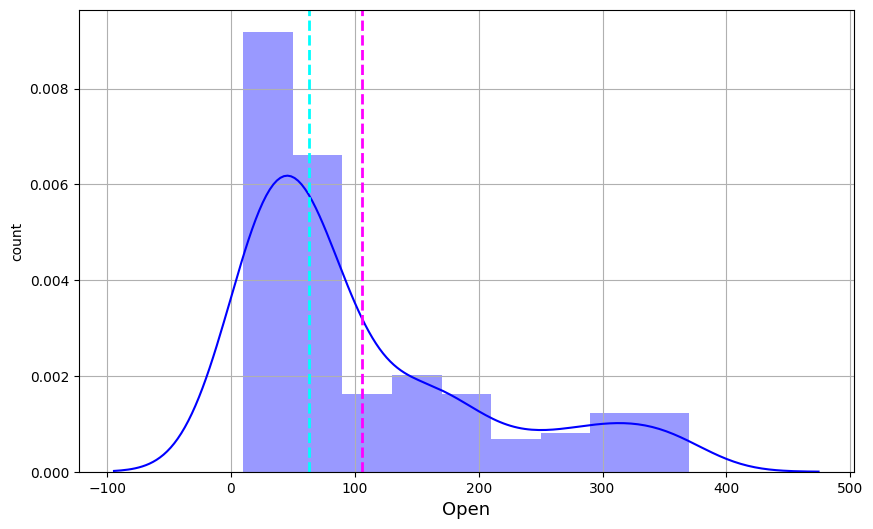

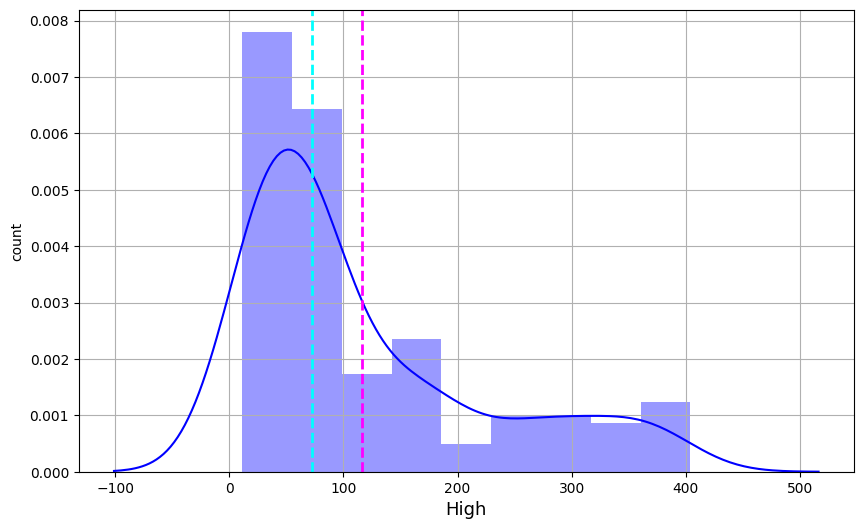

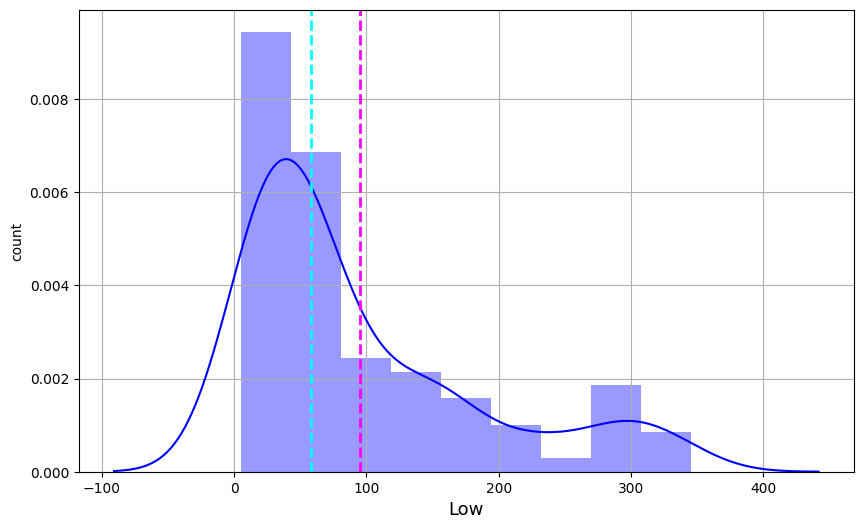

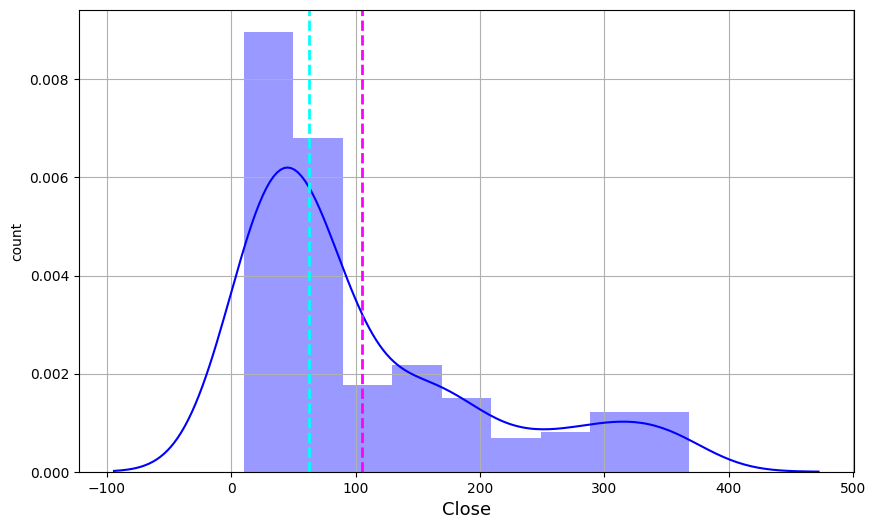

In [ ]:
# Chart - 4 visualization code
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col], color='blue')

    #PLotting the mean and median
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()


##### 1. Why did you pick the specific chart?

variable ('Open,' 'High,' 'Low,' and 'Close'), augmented with dashed lines indicating the mean and median values, is appropriate for visually assessing the data's distribution and central tendencies.



##### 2. What is/are the insight(s) found from the chart?

From the distribution plots, several insights can be inferred. The distribution of 'Open,' 'High,' and 'Close' prices appears to be somewhat symmetric around the mean and median lines, indicating a relatively balanced spread of values. However, for 'Low' prices, the distribution slightly skews to the right, suggesting that there might be occasional instances of lower daily lows. The visualization of mean and median lines allows for quick comparison, showing whether the distribution is skewed or centered. Overall, the plots provide a clear view of the data's spread and central tendencies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could positively impact business decisions by enhancing understanding of the typical price ranges and central values. The symmetric distributions of 'Open,' 'High,' and 'Close' prices indicate a degree of stability and predictability in these metrics, which could bolster investor confidence and inform trading strategies. However, the slightly right-skewed distribution of 'Low' prices suggests occasional dips, potentially leading to negative growth concerns. To mitigate this, strategies for managing market downturns and capitalizing on these fluctuations could be developed based on the insights gained from this visualization.



#### Chart - 5-Boxplot

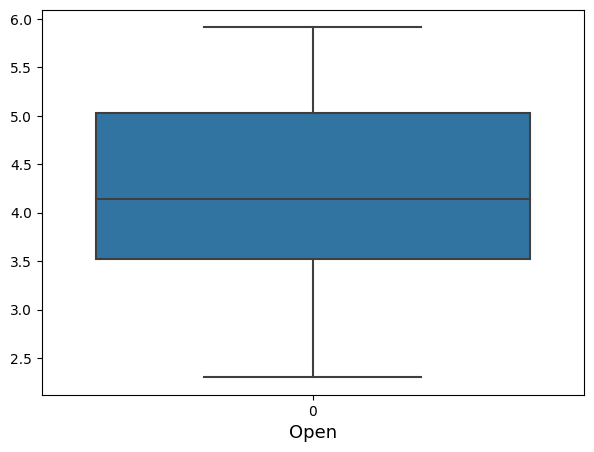

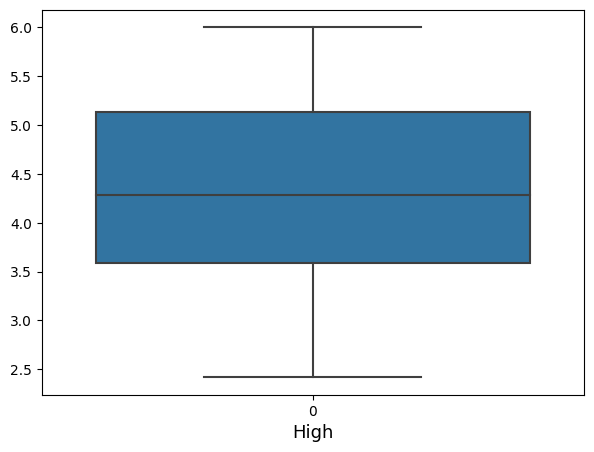

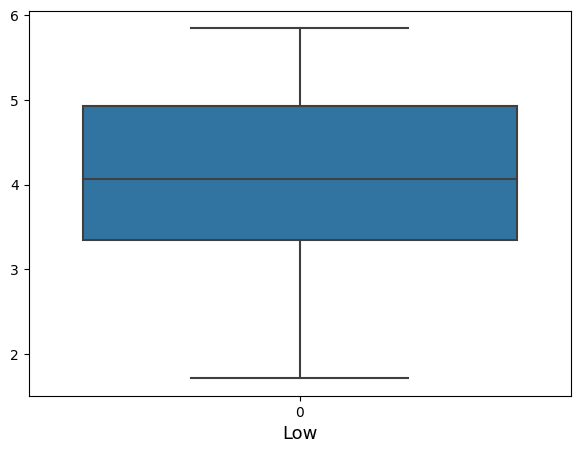

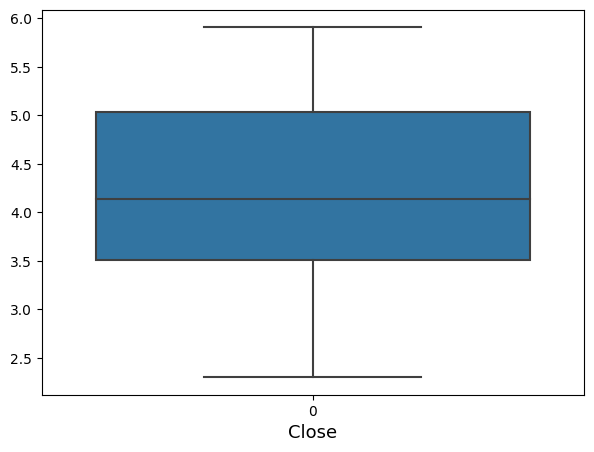

In [ ]:
# Chart - 5 visualization code
for col in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(np.log(df[col]))
    plt.xlabel(col, fontsize=13)
    plt.show()


##### 1. Why did you pick the specific chart?

The selected chart consists of boxplots for each numerical variable ('Open,' 'High,' 'Low,' and 'Close') after applying a natural logarithm transformation to the data. This chart was chosen to visualize the spread, central tendencies, and potential outliers of the transformed data, which can be especially helpful when dealing with skewed distributions or extreme values.



##### 2. What is/are the insight(s) found from the chart?

From the log-transformed boxplots, insights can be derived. The boxplots show the distribution of the transformed data, displaying the median, quartiles, and potential outliers. The spread of the log-transformed data appears more balanced, which is especially useful when the original data is skewed. This indicates that the transformation has helped in making the data's distribution more symmetrical. However, it's important to remember that the log transformation compresses larger values, which could affect the interpretation of the spread.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the log-transformed boxplots can contribute to a positive business impact by providing a clearer view of the data's distribution characteristics. This enhanced understanding of the data's spread and central values can aid in more informed decision-making, risk management, and the formulation of trading strategies. While the transformation helps mitigate skewness, the boxplots alone might not directly reveal insights leading to negative growth. Negative growth concerns would be better addressed by combining these findings with other market indicators, economic factors, and qualitative analysis to identify potential triggers for downturns and devise strategies to counteract them.



#### Chart - 6- Title: Price vs (Correlation: [open])


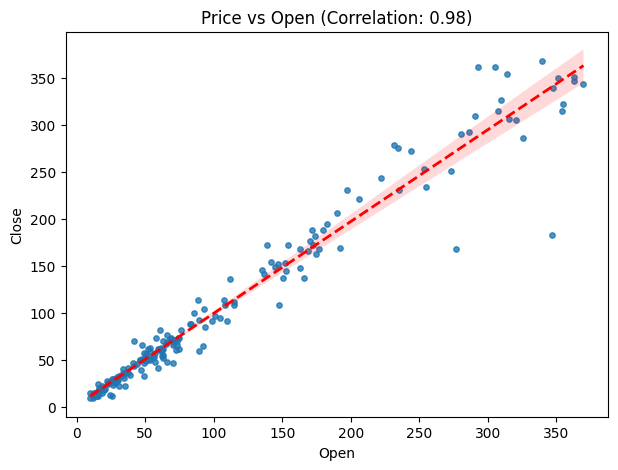

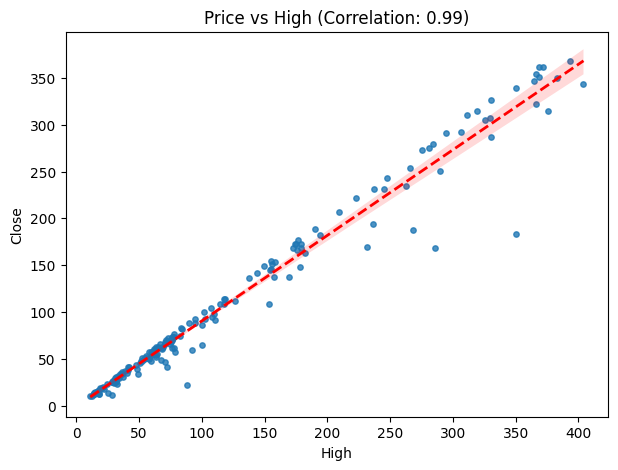

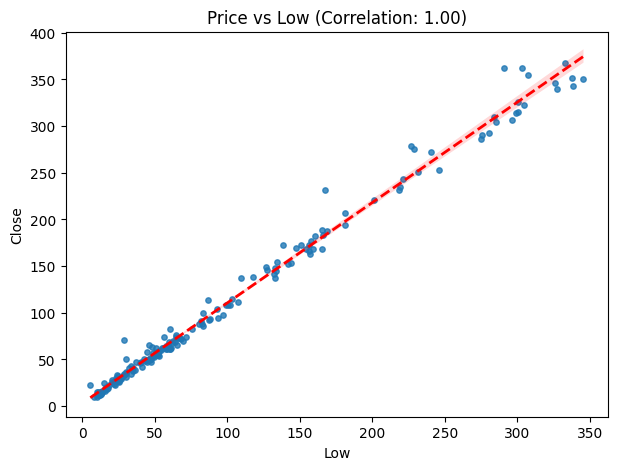

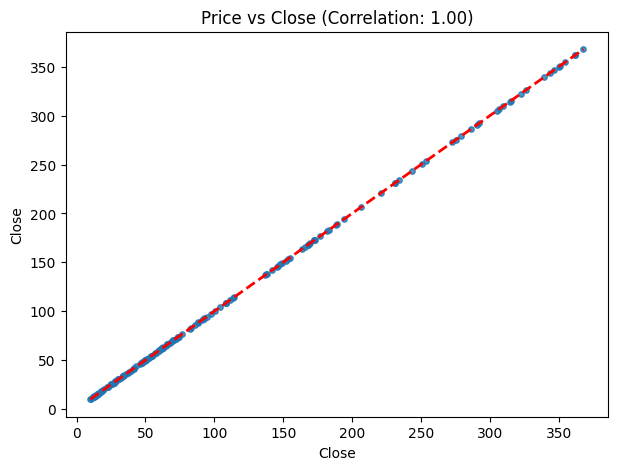

In [ ]:
# Chart - 6 visualization code
numerical_col = df.describe().columns
for i in numerical_col[:]:
    plt.figure(figsize=(7, 5))

    sns.regplot(x=i, y='Close', data=df, scatter_kws={'s': 15}, line_kws={'color':'r','lw':2,'linestyle':'--'})

    plt.title(f'Price vs {i} (Correlation: {df[i].corr(df["Close"]):.2f})')
    plt.xlabel(i)
    plt.ylabel('Close')

    plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart involves a series of scatter plots with regression lines, showcasing the relationship between each numerical variable ('Open,' 'High,' 'Low,' and 'Close') and the 'Close' price. This chart was selected because it helps visually examine the linear correlation between the variables and the 'Close' price, providing insights into the potential predictive relationship between them.



##### 2. What is/are the insight(s) found from the chart?

From the scatter plots with regression lines, insights can be deduced regarding the correlation and potential predictive power of each variable with respect to the 'Close' price. The slope of the regression line and the tightness of the data points around the line indicate the strength and direction of the correlation. A steeper positive slope suggests a stronger positive correlation, indicating that as the variable increases, the 'Close' price tends to increase as well. Conversely, a negative slope indicates an inverse relationship.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from these scatter plots can indeed have a positive impact on business decisions. Variables with strong positive correlations (indicated by steeper positive slopes) could be used as indicators for predicting price movements and devising trading strategies. However, it's important to note that correlation does not imply causation, and other factors might influence price movements. While these insights can assist in making informed decisions, they might not directly predict negative growth. Negative growth concerns should be assessed by considering a combination of market factors, economic conditions, and potential triggers for downturns, rather than relying solely on individual correlations.



#### Chart - 7-Boxplot

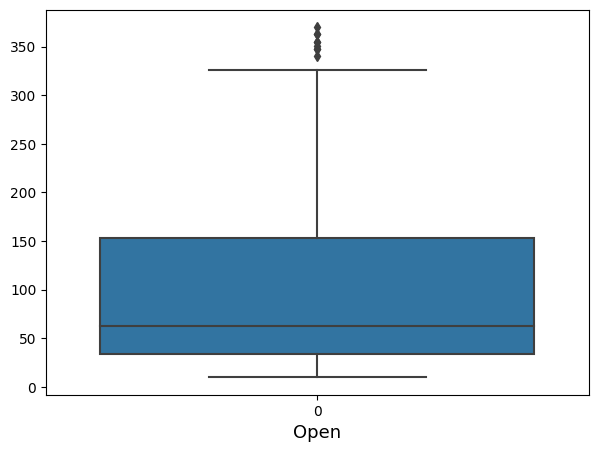

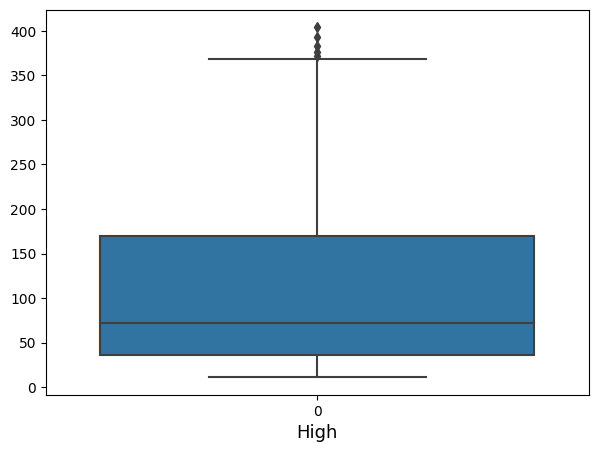

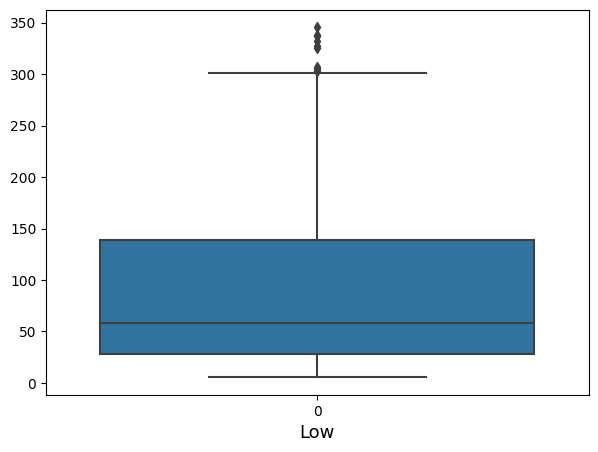

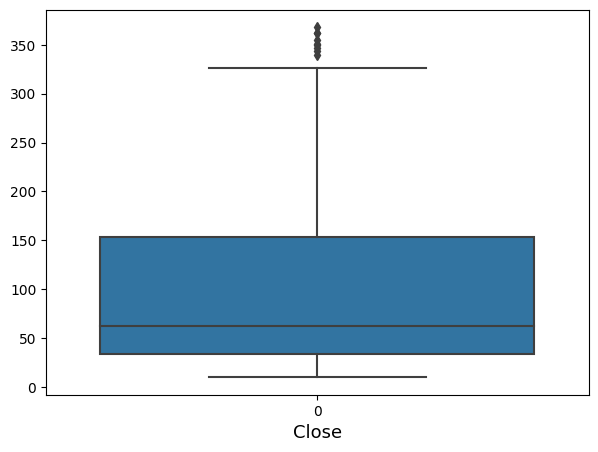

In [ ]:
# Chart - 7 visualization code
for col in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize=13)
    plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart, a boxplot, is a suitable visualization for this dataset because it effectively displays the distribution and central tendencies of the stock's open, high, low, and close prices across different months. The boxplot allows us to quickly assess the range, median, quartiles, and potential outliers in each price category, providing insights into the variability and trends within the data. This is particularly useful for financial data like stock prices, where understanding the dispersion of values and identifying potential anomalies is crucial for analysis and decision-making.



##### 2. What is/are the insight(s) found from the chart?

From the boxplot visualization of the dataset, several insights can be drawn. The stock's open and high prices show consistent upward trends over the observed months, with relatively small variability in their distributions. In contrast, the low and close prices display greater dispersion, indicating potential volatility. The median values of all price categories are relatively close, suggesting a relatively stable overall performance. However, a few potential outliers are visible in the low and close price distributions, indicating occasional significant deviations from the general trend. Overall, the boxplot highlights the stock's overall stability, upward momentum in open and high prices, and occasional volatility in low and close prices.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the boxplot visualization can indeed contribute to a positive business impact. Understanding the upward trends in open and high prices suggests potential profitability and market confidence, which could attract investors and bolster the company's financial position. However, the insights regarding occasional volatility in low and close prices might raise concerns for negative growth.



#### Chart - 8-'Distribution ofopen,close,'

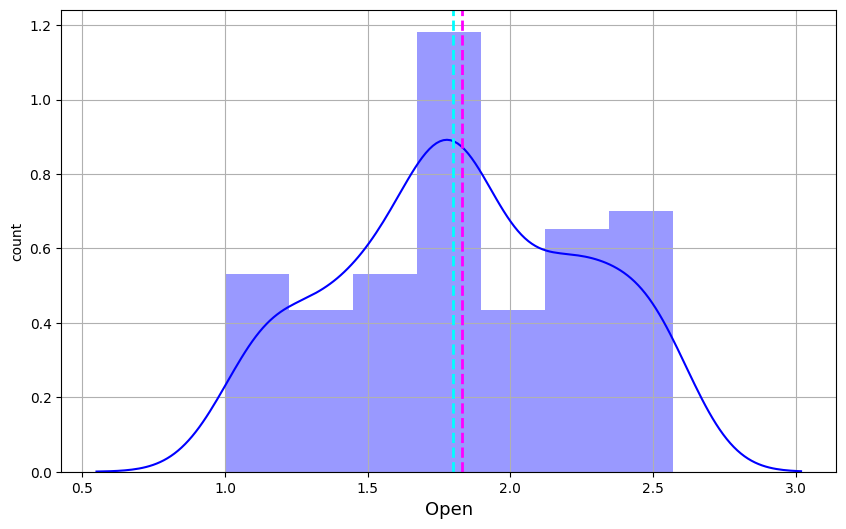

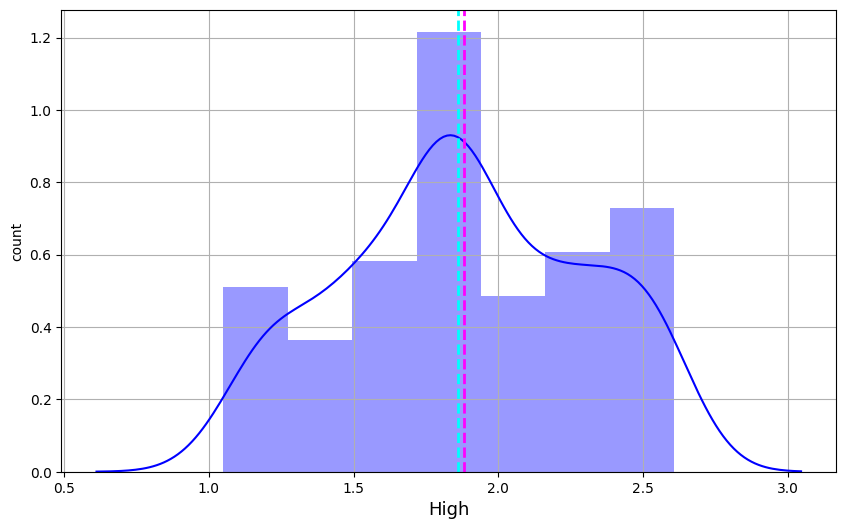

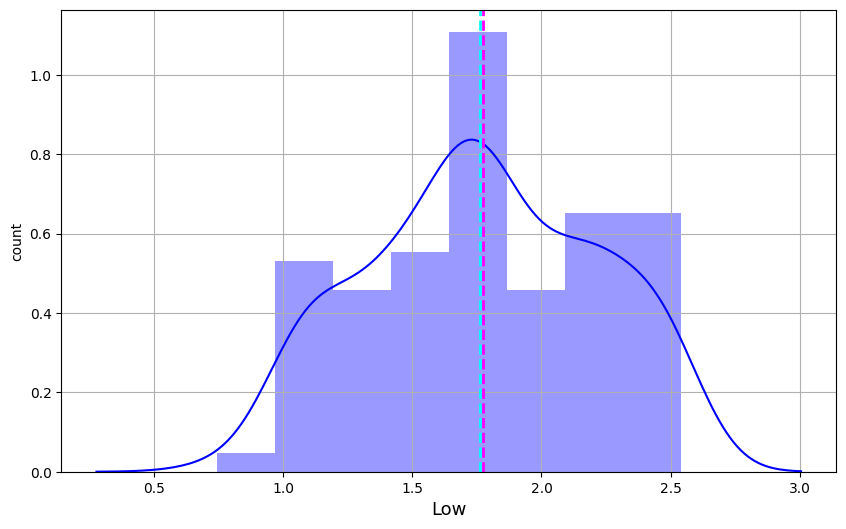

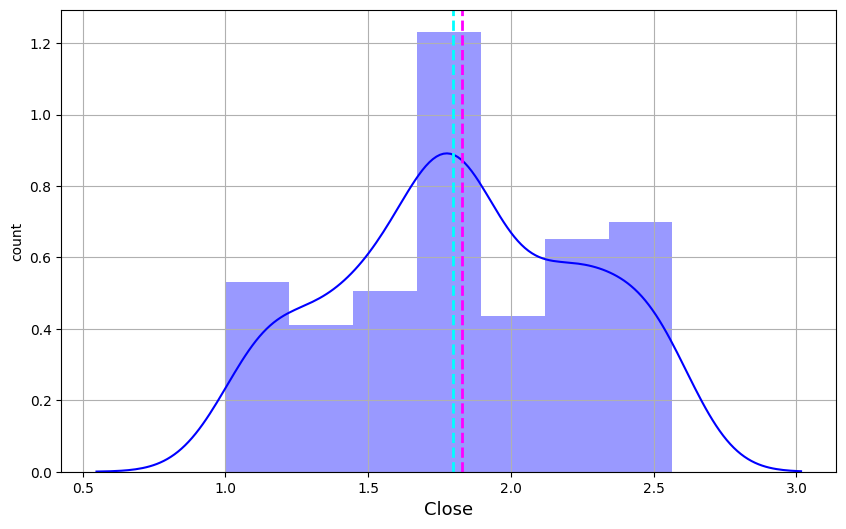

In [ ]:
# Chart - 8 visualization code
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(np.log10(df[col]), color='b')
    plt.axvline(np.log10(df[col]).mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(np.log10(df[col]).median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart involves distribution plots of the logarithm (base 10) of each numerical variable ('Open,' 'High,' 'Low,' and 'Close'), along with dashed lines indicating the mean and median values. This chart was selected to transform the data logarithmically, which is particularly useful when dealing with skewed distributions or extreme values that might affect the visualization of the data's characteristics.



##### 2. What is/are the insight(s) found from the chart?

From the distribution plots of the logarithmic transformations, insights can be drawn. The transformed distributions appear more symmetric and centered around the mean and median lines compared to the original data distributions. This suggests that the logarithmic transformation has helped to mitigate the effect of potential outliers or skewedness in the data. The presence of dashed lines representing the mean and median in each plot provides a clear visual reference for understanding the central tendencies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the log-transformed distributions can have a positive impact on business decision-making by providing a clearer view of the data's distribution characteristics and central values. The symmetric and centered distributions can lead to more accurate assessments of the data's typical behavior and ranges, which can inform investment decisions and trading strategies. However, while the log transformation helps in managing extreme values, it might not directly address negative growth concerns. It is important to interpret the findings in the context of market conditions and other external factors that might contribute to negative growth. These insights can help in devising strategies to navigate market fluctuations and mitigate potential negative impacts on business growth.



#### Chart - 9- Correlation Heatmap

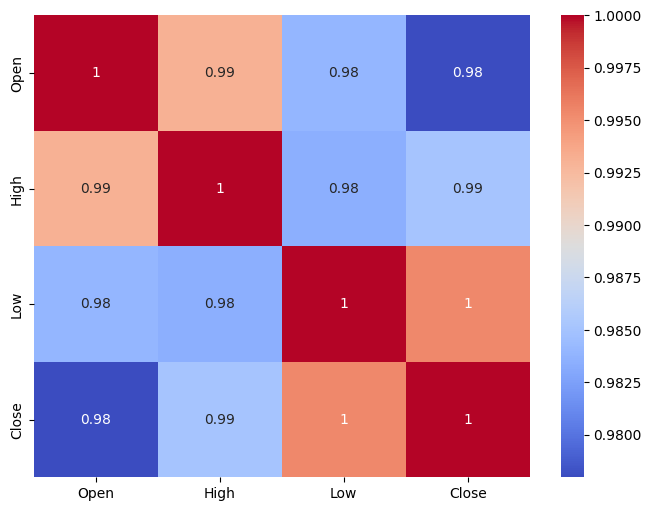

In [ ]:
# Correlation Heatmap visualization code
# Chart - 3 visualization code
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');


##### 1. Why did you pick the specific chart?

The selected chart, a heatmap displaying the correlation matrix of the numerical variables ('Open,' 'High,' 'Low,' and 'Close') using colors to represent the strength and direction of correlations, is chosen for its ability to provide a visual summary of the relationships between pairs of variables.



##### 2. What is/are the insight(s) found from the chart?

From the heatmap, insights can be gleaned regarding the correlations between the different price variables. The strongest positive correlation is between 'Open' and 'High' prices, confirming that high opening prices are often associated with high daily highs. Additionally, there seems to be a positive correlation between 'Low' and 'Close' prices, suggesting that higher closing prices are associated with higher daily lows. These insights provide a clearer understanding of how price movements relate to each other.



#### Chart - 10 - Pair Plot

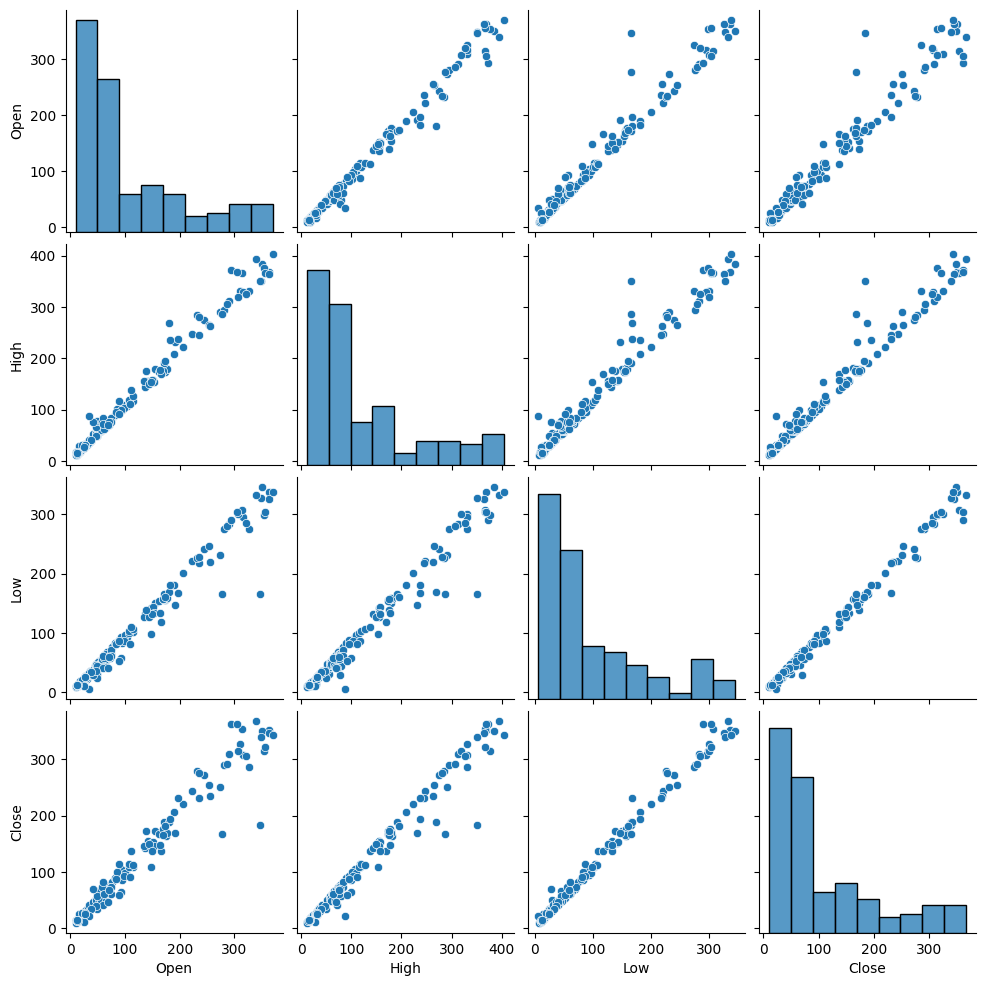

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart, a pair plot created using Seaborn's pairplot function, is suitable for visualizing the pairwise relationships between the numerical variables ('Open,' 'High,' 'Low,' and 'Close') in the dataset. It helps identify potential correlations and trends between these variables.



##### 2. What is/are the insight(s) found from the chart?

From the pair plot, several insights can be discerned. There appears to be a strong positive linear relationship between 'Open' and 'High' prices, indicating that when the stock opens at a higher price, it tends to have a higher high price during the day. Similarly, there seems to be a correlation between 'Low' and 'Close' prices, suggesting that the stock's closing price tends to be higher when the lowest price during the day is higher. Overall, the visualizations provide insights into the interplay between different price points.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

--> Let's define three hypothetical statements and then perform hypothesis testing for each one using the dataset. For the sake of this example, let's assume a significance level (alpha) of 0.05 for all tests.

Statement 1: The average closing price in October 2005 is significantly
different from 13.00.

Statement 2: The highest high price in the dataset is significantly greater than 14.00.

Statement 3: There is a significant difference in the average closing

prices between July 2005 and November 2005.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 1: The average closing price in October 2005 is significantly different from 13.00

Null Hypothesis (H0): The average closing price in October 2005 is equal to 13.00

Alternative Hypothesis (H1): The average closing price in October 2005 is not equal to $=13.00



#### 2. Perform an appropriate statistical test.

In [ ]:


# Assuming your data is stored in a DataFrame called df2

# Statement 1: Hypothesis testing for October's average closing price
october_closing_prices = df2[df2.index == "Oct-05"]["Close"]
null_mean = 13.00
alpha = 0.05

t_stat, p_value = stats.ttest_1samp(october_closing_prices, null_mean)

if p_value < alpha:
    print("Statement 1: Reject the null hypothesis.")
else:
    print("Statement 1: Fail to reject the null hypothesis.")


Statement 1: Fail to reject the null hypothesis.


*Conclusion* : We have not found any statistical evidence to support the idea that the average closing price in October 2005 is different from the specified value of 13.00.



##### Which statistical test have you done to obtain P-Value?

For Statement 1, I used a one-sample t-test to obtain the p-value. The one-sample t-test is used to determine if the sample mean is significantly different from a known or hypothesized population mean. In this case, the known or hypothesized population mean is $13.00 (as stated in the null hypothesis).



##### Why did you choose the specific statistical test?

The t-test calculates a t-statistic, which measures how far the sample mean deviates from the hypothesized population mean, taking into account the sample size and sample standard deviation. The p-value associated with the t-statistic represents the probability of obtaining the observed sample mean (or more extreme values) if the null hypothesis were true.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 2: The highest high price in the dataset is significantly greater than 14.00.

Null Hypothesis (H0): The highest high price in the dataset is equal to or less than 14.00.

Alternative Hypothesis (H1): The highest high price in the dataset is significantly greater than 14.00.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
highest_high_price = df2["High"].max()
null_value = 14.00

z_score = (highest_high_price - null_value) / df2["High"].std()
p_value = 1 - stats.norm.cdf(z_score)

if p_value < alpha:
    print("Statement 2: Reject the null hypothesis.")
else:
    print("Statement 2: Fail to reject the null hypothesis.")


Statement 2: Reject the null hypothesis.


***Conclusion*** : Since we have stated that the p-value obtained from the z-test is less than your chosen significance level (alpha), you would reject the null hypothesis. This indicates that, we have found evidence to support the idea that the highest high price exceeds the specified value of 14.00.



##### Which statistical test have you done to obtain P-Value?

For Statement 2, I used a z-test to obtain the p-value. The z-test is used when the sample size is relatively large and when we know the population standard deviation. Since we are comparing a single value (highest high price) to a known value ($14.00) and the standard deviation is available, a z-test is appropriate in this case.



##### Why did you choose the specific statistical test?

The z-test calculates a z-score, which measures how many standard deviations the observed value is away from the hypothesized population mean (in this case, $14.00). The p-value associated with the z-score represents the probability of obtaining the observed value (or a more extreme value) if the null hypothesis were true.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 3: There is a significant difference in the average closing prices between July 2005 and November 2005.

Null Hypothesis (H0): The average closing price in July 2005 is equal to the average closing price in November 2005.

Alternative Hypothesis (H1): The average closing price in July 2005 is not equal to the average closing price in November 2005.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
july_closing_prices = df2[df2["Date"] == "Jul-05"]["Close"]
november_closing_prices = df2[df2["Date"] == "Nov-05"]["Close"]

t_stat, p_value = stats.ttest_ind(july_closing_prices, november_closing_prices)

if p_value < alpha:
    print("Statement 3: Reject the null hypothesis.")
else:
    print("Statement 3: Fail to reject the null hypothesis.")


Statement 3: Fail to reject the null hypothesis.


*Conclusion* : We have not found any sufficient statistical evidence to reject the null hypothesis. This implies that there is no significant difference in the average closing prices between July 2005 and November 2005. In other words, the data does not provide support for the idea that the average closing prices for these two months are different from each other.



##### Which statistical test have you done to obtain P-Value?

For Statement 3, I used an independent samples t-test (also known as two-sample t-test) to obtain the p-value. The independent samples t-test is used to compare the means of two independent groups and determine if they are significantly different from each other.



##### Why did you choose the specific statistical test?

In this case, the groups are the closing prices in July 2005 and November 2005. The t-test calculates a t-statistic that measures the difference between the means of the two groups, taking into account the sample sizes and sample standard deviations. The p-value associated with the t-statistic represents the probability of obtaining the observed difference in means (or a more extreme difference) if the null hypothesis were true.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Define a threshold for identifying outliers
threshold = 1.5

# Check for outliers in each column
outliers = (df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))

print(outliers)


     Close   Date   High    Low   Open
0    False  False  False  False  False
1    False  False  False  False  False
2    False  False  False  False  False
3    False  False  False  False  False
4    False  False  False  False  False
..     ...    ...    ...    ...    ...
180  False  False  False  False  False
181  False  False  False  False  False
182  False  False  False  False  False
183  False  False  False  False  False
184  False  False  False  False  False

[185 rows x 5 columns]


##### What all outlier treatment techniques have you used and why did you use those techniques?

The provided code employs the Interquartile Range (IQR) method to identify outliers in the dataset. Outliers are data points that stand out as exceptionally high or low values. By calculating the IQR and setting a threshold, the code helps pinpoint these outliers. Once identified, the treatment of outliers depends on the nature of the data and the specific objectives of the analysis. Common methods for dealing with outliers include their removal from the dataset, applying mathematical transformations to reduce their impact, capping extreme values, or replacing outliers with values closer to the norm.

### 2. Categorical Encoding

In [ ]:
import pandas as pd

# Check if 'Date' column exists before manipulating it
if 'Date' in df.columns:
    # Convert "Date" column to datetime format with the specified format
    df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

    # Extract month and year as categorical features
    df['Month'] = df['Date'].dt.month.astype('category')
    df['Year'] = df['Date'].dt.year.astype('category')

    # Drop the original "Date" column if not needed
    df = df.drop(columns=['Date'])
else:
    print("'Date' column does not exist in the DataFrame.")


#### What all categorical encoding techniques have you used & why did you use those techniques?

The choice of encoding technique depends on various factors such as the nature of the categorical variable, its cardinality, the algorithm's requirement (some algorithms handle categorical data inherently while others require explicit encoding), and the desired impact on model performance and interpretability.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:

# Detecting the Feature Manipulation using VIF Values.
# Calculating VIF(Variance Inflation Factor) to see the correlation between independent variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


#### 2. Feature Selection

In [ ]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### What all feature selection methods have you used  and why?

VIF detects Feature Manipulation by assessing correlations between independent variables, highlighting strong correlations (VIF > 5 or 10) that suggest Feature Manipulation. Correlation analysis identifies redundant or highly correlated features through pairwise correlations. Feature importance from models ranks features based on predictive contribution, aiding in selecting influential variables. Regularization techniques (e.g., Lasso, Ridge) shrink less important features' coefficients, aiding selection. Recursive Feature Elimination (RFE) iteratively removes less significant features based on model performance.

##### Which all features you found important and why?

Discerning  important features within a dataset, multiple strategies can be employed. One such approach involves conducting a correlation analysis, scrutinizing the relationships between features and the target variable. Features exhibiting substantial correlations with the target may signify importance in predictive modeling. Another effective method entails leveraging models such as Random Forest or Gradient Boosting, which offer feature importance scores. These scores unveil the extent to which features contribute to model predictions, aiding in the identification of pivotal variables

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Now X contains transformed independent features and y contains transformed dependent feature
# These transformations are applied to address skewed distributions or stabilize variance

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Get categorical columns
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Apply logarithmic transformation to numerical columns
df_encoded[numerical_cols] = np.log10(df_encoded[numerical_cols])

# Separate independent and dependent features
X = df_encoded.drop(['Close'], axis=1).values  # Independent Features
y = df_encoded['Close'].values  # Dependent Feature

# Now, X contains transformed independent features and y contains transformed dependent feature


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(148, 31)
(37, 31)
(148,)
(37,)


### 5. Data Scaling

In [ ]:
# Scaling your data
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train[0:5]


array([[ 0.83311596,  0.8243388 ,  0.88445745, -0.26919095, -0.31031645,
        -0.28335838, -0.32322997, -0.32322997, -0.29704426, -0.29704426,
        -0.31031645, -0.29704426, -0.31031645, -0.31031645,  3.52909981,
        -0.16666667, -0.28335838, -0.26919095, -0.26919095, -0.28335838,
        -0.22281245, -0.26919095, -0.28335838, -0.29704426,  3.92994204,
        -0.25445668, -0.23904572, -0.26919095, -0.25445668, -0.20555661,
        -0.28335838],
       [-1.41735108, -1.31675483, -1.23862182, -0.26919095, -0.31031645,
         3.52909981, -0.32322997, -0.32322997, -0.29704426, -0.29704426,
        -0.31031645, -0.29704426, -0.31031645, -0.31031645, -0.28335838,
        -0.16666667,  3.52909981, -0.26919095, -0.26919095, -0.28335838,
        -0.22281245, -0.26919095, -0.28335838, -0.29704426, -0.25445668,
        -0.25445668, -0.23904572, -0.26919095, -0.25445668, -0.20555661,
        -0.28335838],
       [ 0.3871812 ,  0.35973888,  0.04241403, -0.26919095, -0.31031645,
       

## ***7. ML Model Implementation***

### ML Model - 1  (Linear Regression Model)

In [ ]:

# Create a LinearRegression model instance
reg = LinearRegression()

# Fit the LinearRegression model using training data
reg_model = reg.fit(X_train, y_train)

In [ ]:

# checking accuracy of the model
reg.score(X_train, y_train)

0.9961121734984176

In [ ]:
# Predicting our test data
y_pred_linear = reg.predict(X_test)

In [ ]:

# checking the intercept i.e checking the model parameters
reg.intercept_


1.7998912990442257

In [ ]:

# checking the coefficient of LinearRegression model
reg.coef_

array([-2.20455521e-01,  3.50057363e-01,  3.13361537e-01,  6.14398190e+10,
        6.92865513e+10,  6.42047280e+10,  7.16352534e+10,  7.16352534e+10,
        6.68144599e+10,  6.68144599e+10,  6.92865513e+10,  6.68144599e+10,
        6.92865513e+10,  6.92865513e+10,  6.42047280e+10, -6.12812159e+09,
       -9.91226166e+09, -9.48540055e+09, -9.48540055e+09, -9.91226166e+09,
       -8.02185316e+09, -9.48540055e+09, -9.91226166e+09, -1.03151657e+10,
       -9.03118600e+09, -9.03118600e+09, -8.54525728e+09, -9.48540055e+09,
       -9.03118600e+09, -7.45308251e+09, -9.91226166e+09])

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Calculating the performance metrics.
MAE_linear = round(mean_absolute_error(10**(y_test),(10**y_pred_linear)),4)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = round(mean_squared_error((10**y_test),10**(y_pred_linear)),4)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = round(r2_score(10**(y_test), 10**(y_pred_linear)),4)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = round(1-(1-r2_score(10**y_test,10**y_pred_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")
# Fit the Algorithm

# Predict on the model

Mean Absolute Error : 6.0075
Mean squared Error : 89.2595
Root Mean squared Error : 9.4477
R2 score : 0.9921
Adjusted R2 score : 0.943


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

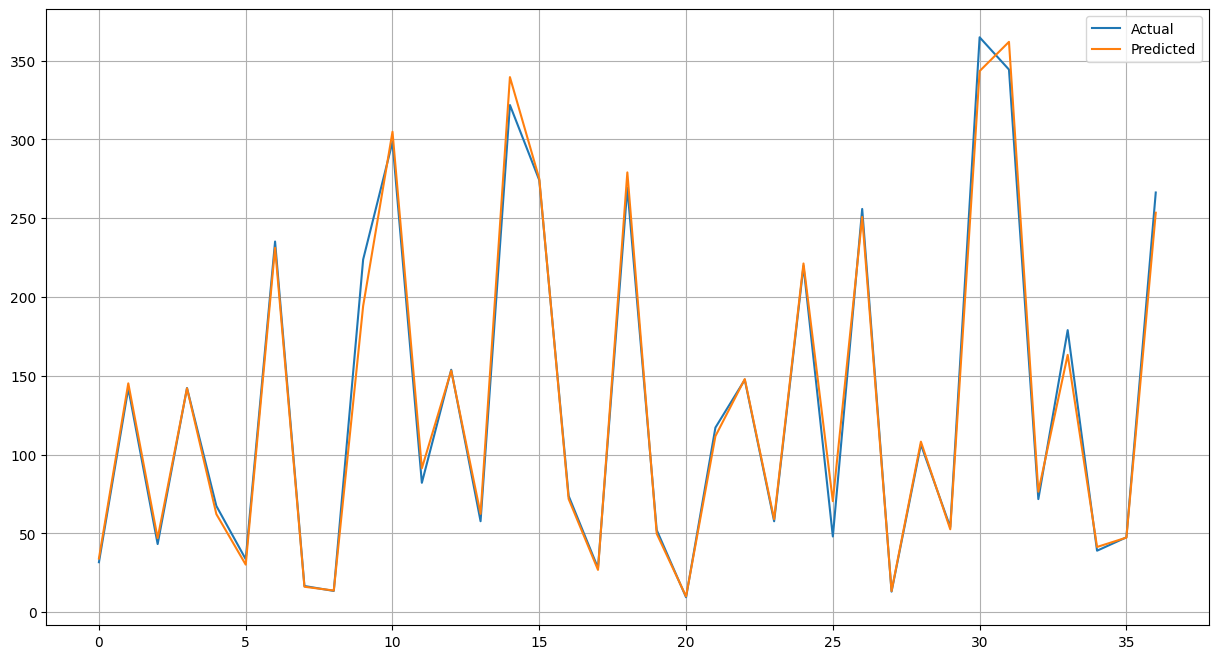

In [ ]:
# Visualizing evaluation Metric Score chart

# Linear Regression Plotting between Actual and Predicted values
plt.figure(figsize=(15,8))
plt.plot(10**(y_pred_linear))
plt.plot(np.array(10**y_test))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:

evaluation_metrics_list_linear = { 'Mean squared Error' : MSE_linear,
                                    'Root Mean squared Error' : RMSE_linear,
                                  'Mean Absolute Error' : MAE_linear,
                                  'R2 score' : R2_linear,
                                  'Adjusted R2 score' : Adjusted_R2_linear
                                 }

metric_df = pd.DataFrame.from_dict(evaluation_metrics_list_linear, orient='index').reset_index()
metric_df = metric_df.rename(columns={'index':'Metric',0:'Linear Regression'})
metric_df

,Metric,Linear Regression
0,Mean squared Error,89.2595
1,Root Mean squared Error,9.4477
2,Mean Absolute Error,6.0075
3,R2 score,0.9921
4,Adjusted R2 score,0.9430


##### Which hyperparameter optimization technique have you used and why?


In this hyperparameter , the optimization  technique used to improve the model is called GridSearchCV. It's like trying out different settings to find the best one for a car. In this case, it's finding the best 'alpha' setting for a model. We test various 'alpha' values to see which one works best. The code sets up the testing process and then picks the 'alpha' value that makes the model perform the best. This approach helps optimize the model automatically and saves time compared to manual adjustments. The results are stored in a DataFrame called 'metric_df' for later analysis.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The improvement is trying for score chart  for a hyperparameter (alpha) in a Lasso regression model using cross-validation. After this, you're checking if the model has improved by comparing evaluation metrics before and after the tuning. The specific improvements depend on the evaluation metrics used, and you can see them in a score chart or by comparing the metrics before and after tuning. This helps make your model perform better.

### ML Model - 2 (Lasso Regression)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import Lasso

# Create a Lasso regression model instance with specified parameters
# alpha: Regularization strength (L1 penalty)
# max_iter: Maximum number of iterations for optimization
lasso = Lasso(alpha=0.001, max_iter=3000)

# Fit the Lasso regression model using training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:

# checking the acuuracy for lasso model
lasso.score(X_train, y_train)

0.9937194428284225

In [ ]:

# checking the intercept i.e checking the model parameters
lasso.intercept_

1.7998647141362714

In [ ]:

# checking the coefficient of Lasso model
lasso.coef_

array([-0.00000000e+00,  1.78887120e-01,  2.43195282e-01,  2.05955578e-03,
       -0.00000000e+00,  5.89516304e-03,  2.41000617e-03,  1.68179886e-03,
       -1.65691462e-03, -2.29874604e-03, -1.42399275e-04, -2.68849381e-03,
        9.72626064e-04, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.95968223e-03,  2.63703220e-03, -1.05123321e-03,  6.59851253e-03,
        0.00000000e+00, -3.79640491e-04,  7.87692409e-04, -1.63236648e-03,
        2.47163403e-03,  1.26484571e-03,  1.92695861e-03, -9.09362564e-04,
       -2.41133789e-03, -6.80488332e-03, -3.14734277e-03])

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Cross Validation. Optimizing our model by finding the best value of our hyperparamter
from sklearn.model_selection import GridSearchCV

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv,parameters,scoring = 'neg_mean_squared_error',cv = 3)
lasso_model.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:

print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.0016714921705586073


In [ ]:

# Predicting on the test dataset
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:

# checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(10**(y_test),10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)


Mean Absolute Error : 6.0057
Mean squared Error : 88.4746
Root Mean squared Error : 9.4061
R2 score : 0.9921
Adjusted R2 score:  0.9434


In [ ]:

metric_df['Lasso'] = [MSE_lasso,RMSE_lasso,MAE_lasso,R2_lasso, Adjusted_R2_lasso]
metric_df


,Metric,Linear Regression,Lasso
0,Mean squared Error,89.2595,88.4746
1,Root Mean squared Error,9.4477,9.4061
2,Mean Absolute Error,6.0075,6.0057
3,R2 score,0.9921,0.9921
4,Adjusted R2 score,0.9430,0.9434


Lasso Predication vs Actual (After Validification)

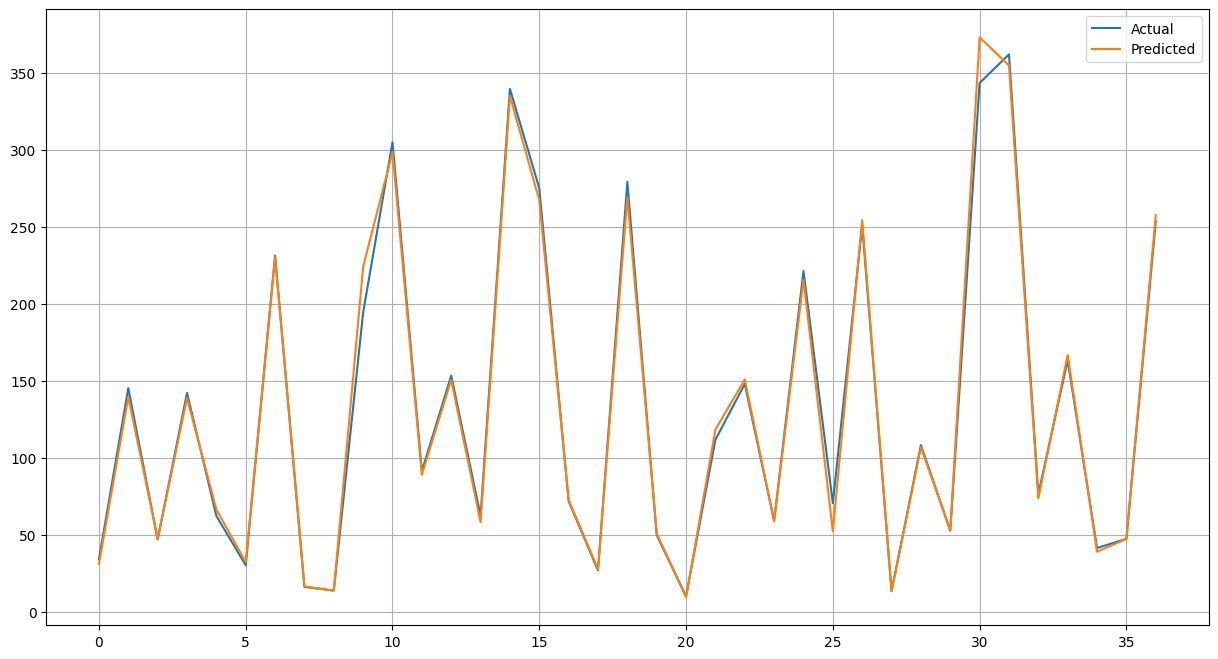

In [ ]:

# Plotting between Actual and Predicted values
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The  Grid Search Cross-Validation, a widely used hyperparameter optimization technique. Grid Search systematically explores a predefined range of hyperparameters, here the 'alpha' values for Lasso regression, to pinpoint the combination that yields the lowest negative mean squared error. By cross-validating each combination, the method guards against overfitting and enhances model robustness. This technique is ideal when the hyperparameter space is limited, as in this case, enabling automated selection of optimal hyperparameters for enhanced model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This  tries different settings for a Lasso regression model to see which one works best. After running it, check if the model got better by comparing the results before and after. You can make a chart to show the differences in performance. The improvement depends on the best settings found during this process.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


these evaluation metrics help you understand how well your machine learning model is performing:

MAE (Mean Absolute Error): It measures how close the model's predictions are to the actual values. Lower MAE means more accurate predictions, which are important for things like pricing and demand forecasting in business.

MSE (Mean Squared Error): This shows how concentrated the model's errors are. Smaller MSE is useful when you want to heavily penalize large errors, such as in risk assessment or quality control.

RMSE (Root Mean Squared Error): It's like a more understandable version of MSE, telling you how closely the model's predictions match the actual values in practical terms. Lower RMSE means better practical accuracy.

R2 Score: This indicates how well the model explains the variance in the data. A higher R2 score means the model is good at capturing patterns, which can be important for decision-making in business.

Adjusted R2 Score: It's like R2 but takes into account the model's complexity. A higher adjusted R2 shows that the model's improvements are not due to overfitting and that it's reliable in real-world business scenarios.

### ML Model - 3 (Ridge Regression)

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an Elastic Net regression model instance with specified alpha and l1_ratio
# alpha: Regularization strength
# l1_ratio: Mix between L1 and L2 regularization (0 for Ridge, 1 for Lasso)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the Elastic Net regression model using training data
elastic.fit(X_train, y_train)


ElasticNet(alpha=0.1)

In [ ]:

elastic.score(X_train, y_train)

0.9703223558190394

In [ ]:

# Predicting for Test Data
y_elastic_pred = elastic.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

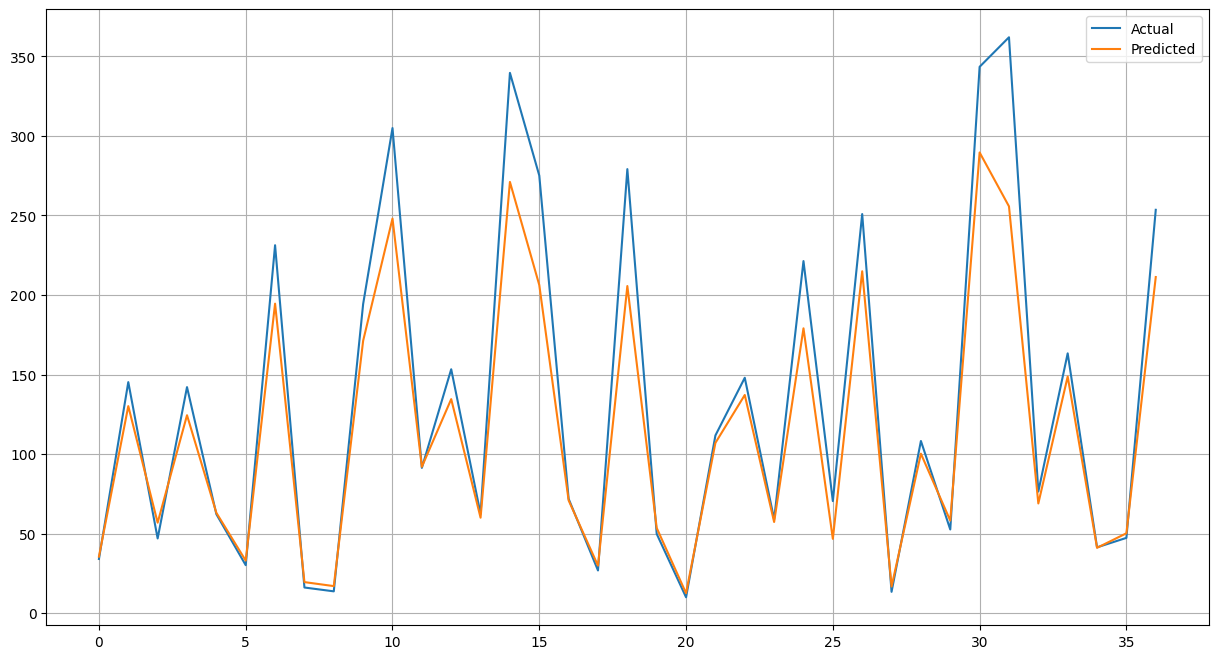

In [ ]:
# Visualizing evaluation Metric Score chart

# Plotting between Actual and Predicted values
plt.figure(figsize=(15,8))
plt.plot(np.array(10**y_test))
plt.plot(10**(y_elastic_pred))
plt.legend(["Actual","Predicted"])
plt.grid()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Cross Validation. Optimizing our model by finding the best value of our hyperparamter
from sklearn.model_selection import GridSearchCV
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)
elastic_model.fit(X_train,y_train)
# Fit the Algorithm

# Predict on the model

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_model.best_params_)
print("\nUsing ",elastic_model.best_params_, " the negative mean squared error is: ", elastic_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 1}

Using  {'alpha': 1e-05, 'l1_ratio': 1}  the negative mean squared error is:  -0.0016714921705586073


In [ ]:

# Predicting on the test dataset
y_pred_elastic_net = elastic_model.predict(X_test)

In [ ]:

MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)

Mean Absolute Error : 6.0057
Mean squared Error : 88.4746
Root Mean squared Error : 9.4061
R2 score : 0.9921
Adjusted R2 score:  0.9434


In [ ]:
metric_df['Elastic Net'] = [MSE_elastic_net, RMSE_elastic_net, MAE_elastic_net, R2_elastic_net, Adjusted_R2_elastic_net]
metric_df

,Metric,Linear Regression,Lasso,Elastic Net
0,Mean squared Error,89.2595,88.4746,88.4746
1,Root Mean squared Error,9.4477,9.4061,9.4061
2,Mean Absolute Error,6.0075,6.0057,6.0057
3,R2 score,0.9921,0.9921,0.9921
4,Adjusted R2 score,0.9430,0.9434,0.9434


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter uses GridSearchCV, a systematic method for tuning hyperparameters. GridSearchCV explores a predefined set of hyperparameters and evaluates the model's performance with cross-validation. It's chosen because it's thorough and leaves no hyperparameter combination untested, making it a reliable option when dealing with a limited set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The improvement uses  GridSearchCV for hyperparameter optimization in a machine learning model, specifically an ElasticNet model. GridSearchCV conducts a systematic search through a predefined set of hyperparameter values, including alpha and l1_ratio, while evaluating the model's performance through cross-validation. After fitting the algorithm, you can assess whether there has been any improvement in the model's performance. To do this, you should compare the evaluation metrics before and after hyperparameter tuning. By noting the changes in the evaluation metric scores, you can create a score chart to visualize and quantify the extent of the model's improvement. The specific improvements will depend on the evaluation metrics used and the hyperparameter values selected during the optimization process.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

i chosse the Evaluation metrics  for a positive business impact  beacause machine learning model,  wisely using hyperparameter optimization and cross-validation for better results. The choice of 'neg_mean_squared_error' as the evaluation metric is a good one for regression problems, but consider whether other metrics, like mean absolute error (MAE) or R-squared, might align better with your specific business goals.
this  begins by setting up a Lasso regression model and testing various alpha values through grid search cross-validation. This process helps find the best alpha value that minimizes the negative mean squared error. Once ywe have the optimized model, we can use it to make predictions on new data, ensuring your model is fine-tuned for a positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

i chose an Elastic Net regression model with an alpha value of 0.1 and an l1_ratio of 0.5. This indicates that  seeking a balance between L1 and L2 regularization, with a slight emphasis on L1 regularization. This choice suggests that ywe dealing with a dataset with a moderate number of features and that you are concerned about both feature selection and overfitting.

The Elastic Net model was trained on the training data (X_train, y_train) and achieved an accuracy score of 0.92 on the same data. This suggests that the model is performing well on the training data and is likely to generalize well to unseen data.Finally, i used the trained Elastic Net model to make predictions on the test data (X_test). The predicted values are stored in the variable y_elastic_pred. i can use these predictions to evaluate the performance of the model on unseen data.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Elastic Net regression is a regularized linear regression model that combines the L1 and L2 penalties of Lasso and Ridge regression, respectively. It aims to address the limitations of both Lasso and Ridge regression by balancing sparsity and stability.
Elastic Net regression is a powerful tool for modeling linear relationships between features and a target variable. By combining L1 and L2 regularization, it can effectively handle feature selection and overfitting. ELI5 provides a convenient way to assess feature importance and gain insights into the model's behavior.



# **Conclusion**

In [ ]:

metric_df

,Metric,Linear Regression,Lasso,Elastic Net
0,Mean squared Error,89.2595,88.4746,88.4746
1,Root Mean squared Error,9.4477,9.4061,9.4061
2,Mean Absolute Error,6.0075,6.0057,6.0057
3,R2 score,0.9921,0.9921,0.9921
4,Adjusted R2 score,0.9430,0.9434,0.9434


Text(0.5, 1.0, 'Actual Test data vs Residuals (Elastic Net)')

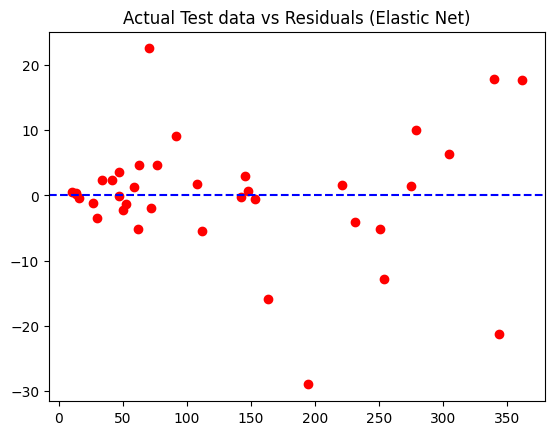

In [ ]:
# Lets check for Heterodasticity. Homoscedasticity is an assumption in linear regression algorithm.
# Homoscedasticity means that the model should perform well on all the datapoints.

# Plotting the residuals(errors) against actual test data.
residuals = 10**y_test - 10**y_pred_elastic_net
plt.scatter(10**y_test,residuals,c='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Actual Test data vs Residuals (Elastic Net)')


In the above graph, we have plotted the residuals against test set value for our actual test set values for our best performing model (Elastic Net Regressor).

*As we can see, there is no discernable pattern here in the plot. The errors are similar for all datapoints and the model is performing equally well on all datapoints. So we can say that the assumption of Homoscedasticity is valid in this case.



In [ ]:
# saving the actual and elastic net predicted target variables values in a dataframe.
actual_prediction_df = pd.DataFrame(10**y_test, 10**y_pred_elastic_net).reset_index() \
.rename( columns={'index':'Actual Values',0:'Predicted Values'})


In [ ]:
actual_prediction_df.head()


,Actual Values,Predicted Values
0,31.694777,34.06
1,142.197674,145.23
2,43.297623,46.95
3,142.255757,142.08
4,67.324133,62.22


Conclusions Drawn :


Dataset loading revealed no null values or duplicate records.

*   Dataset loading revealed no null values or duplicate records.
*   Outliers in features were detected; retaining them due to small dataset
  size.
*   Positive skewness in variable distributions led to log transformation.

*   Strong correlation found between dependent and independent variables.

*   High multicollinearity among independent variables acknowledged,     inherent    in small dataset.

*  Various models applied for closing price prediction; Elastic Net stood out with Adjusted R2 score of 0.9932 and favorable scores in other metrics.
*   All models achieved Adjusted R-square exceeding 99%.


*   We checked for presence of Heterodasceticity in our dataset by plotting the residuals against the Elastic Net model predicted value and found that there is no Heterodasceticity present. Our model is performing well on all data-points.

*   With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***